In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('scores.csv')

In [3]:
data

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [4]:
data['DeltaMADRS'] = data.madrs2 - data.madrs1

In [5]:
data_condition = data[data.number.str.contains('condition')].copy()
data_control = data[data.number.str.contains('control')].copy()

In [6]:
data_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,1.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0


In [7]:
data_condition.shape

(23, 13)

In [8]:
# winpandaz test his brance ok na.

In [9]:
txt_missing = '_MISSING_'

In [10]:
data_condition.melanch = data_condition.melanch.fillna(txt_missing)
data_condition.melanch = data_condition.melanch.astype('category')
data_condition.melanch = data_condition.melanch.cat.rename_categories({-1 : txt_missing, 1.0 : '1', 2.0 : '2'})

data_condition.age = data_condition.age.astype('category')
data_condition.gender = data_condition.gender.astype('category')

data_condition.afftype = data_condition.afftype.astype(int).astype('category')
data_condition.inpatient = data_condition.inpatient.astype(int).astype('category')
data_condition.marriage = data_condition.marriage.astype(int).astype('category')
data_condition.work = data_condition.work.astype(int).astype('category')

data_condition.edu = data_condition.edu.astype('category')
data_condition.edu = data_condition.edu.cat.rename_categories({' ' : txt_missing})

In [11]:
data_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2,2,2,6-10,1,2,19.0,19.0,0.0
1,condition_2,18,2,40-44,1,2,2,6-10,2,2,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2,2,2,6-10,2,2,24.0,25.0,1.0
3,condition_4,13,2,25-29,2,2,2,11-15,1,1,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2,2,2,11-15,2,2,26.0,26.0,0.0
5,condition_6,7,1,35-39,2,2,2,6-10,1,2,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1,_MISSING_,2,11-15,2,1,24.0,25.0,1.0
7,condition_8,5,2,25-29,2,_MISSING_,2,11-15,1,2,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1,_MISSING_,2,6-10,1,2,26.0,26.0,0.0
9,condition_10,9,2,45-49,2,2,2,6-10,1,2,28.0,21.0,-7.0


In [12]:
features_num = ['days','madrs1','madrs2','DeltaMADRS']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

In [13]:
data_condition[features_num].describe()

,days,madrs1,madrs2,DeltaMADRS
count,23.000000,23.000000,23.000000,23.000000
mean,12.652174,22.739130,20.000000,-2.739130
std,2.773391,4.797892,4.729021,3.968253
min,5.000000,13.000000,11.000000,-13.000000
25%,12.500000,18.500000,16.000000,-5.000000
50%,13.000000,24.000000,21.000000,-3.000000
75%,14.000000,26.000000,24.500000,0.000000
max,18.000000,29.000000,28.000000,4.000000


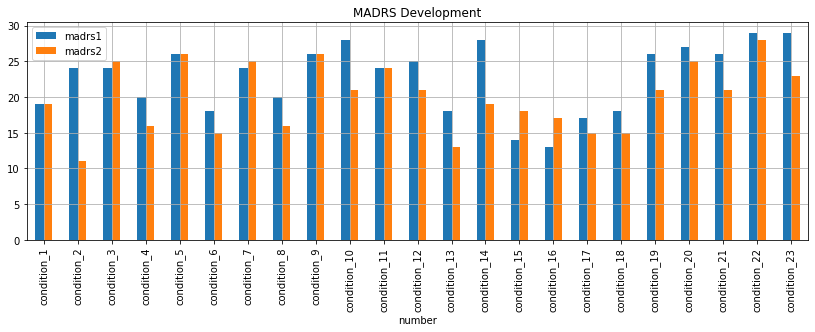

In [14]:
temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
data_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras

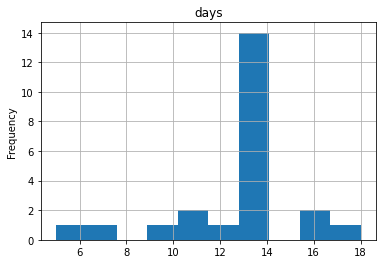

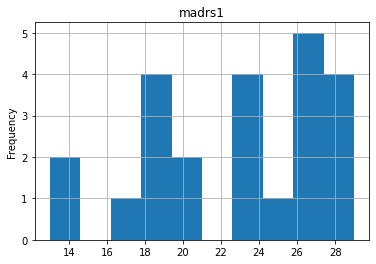

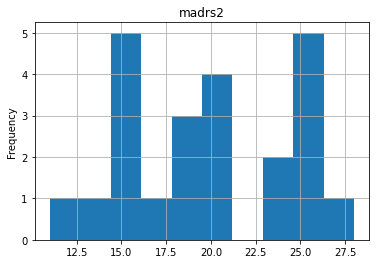

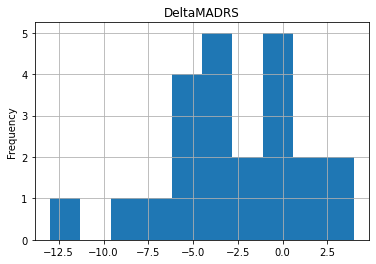

In [15]:
for f in features_num:
    data_condition[f].plot(kind='hist')
    plt.title(f)
    plt.grid()
    plt.show()

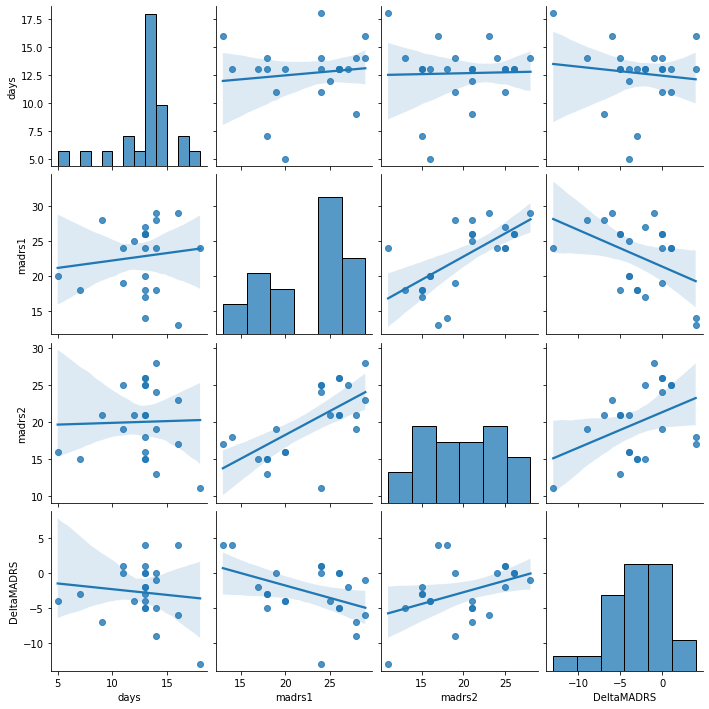

In [17]:
sns.pairplot(data_condition[features_num], kind='reg')
plt.show()

In [18]:
# correlation matrix
data_condition[features_num].corr(method='pearson')

,days,madrs1,madrs2,DeltaMADRS
days,1.000000,0.122678,0.027726,-0.115285
madrs1,0.122678,1.000000,0.653090,-0.430772
madrs2,0.027726,0.653090,1.000000,0.402082
DeltaMADRS,-0.115285,-0.430772,0.402082,1.000000


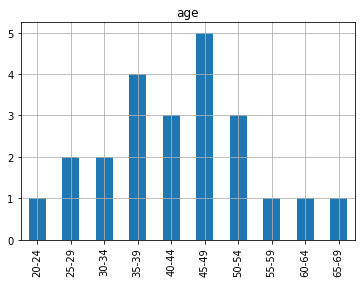

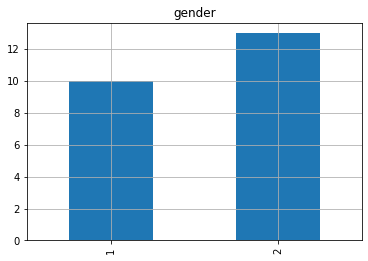

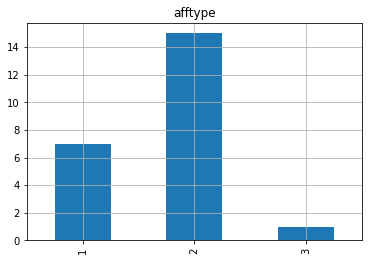

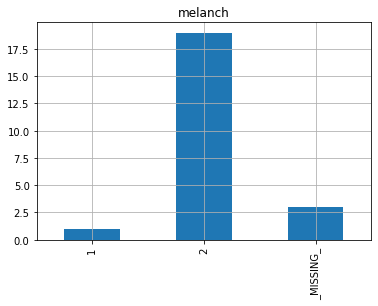

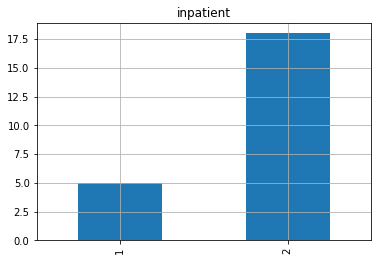

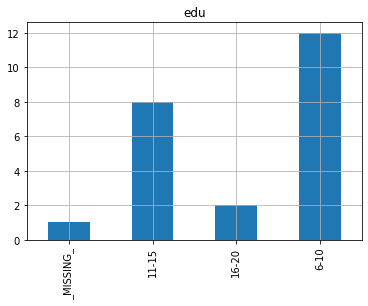

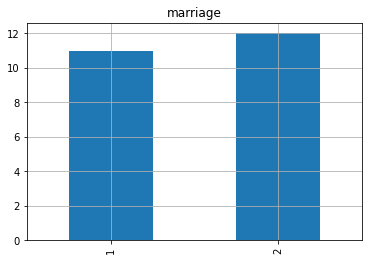

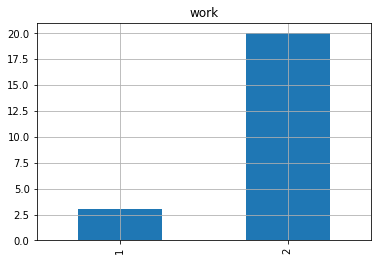

In [19]:
# plot distributions of categorical features
for f in features_cat:
    data_condition[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

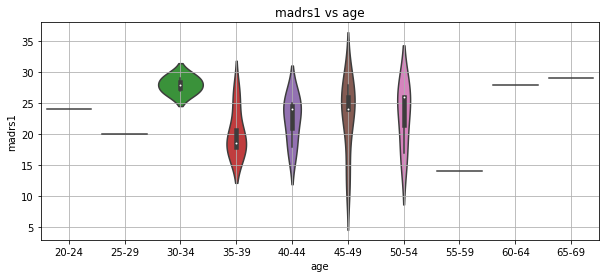

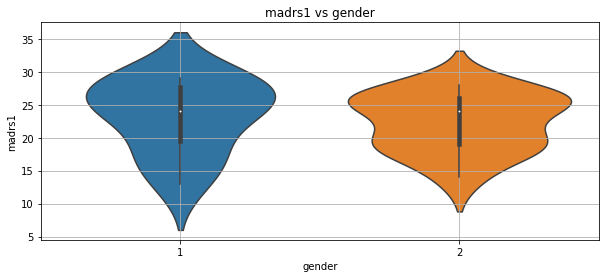

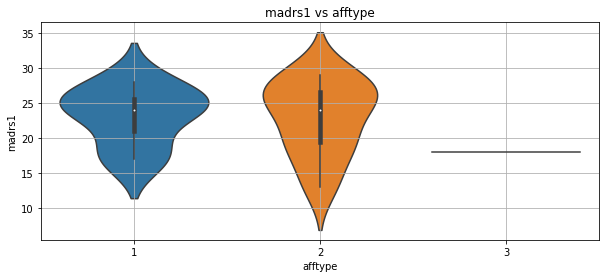

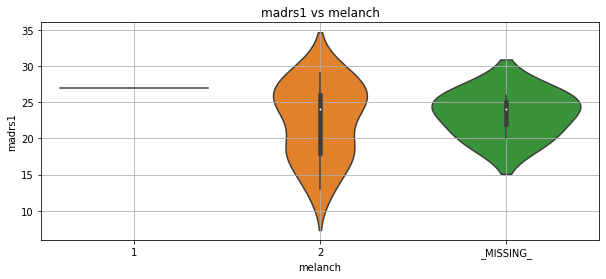

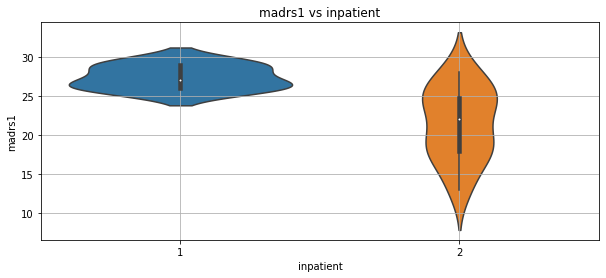

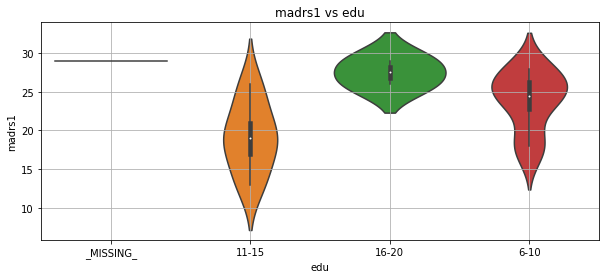

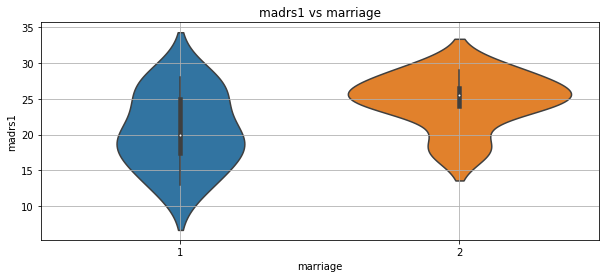

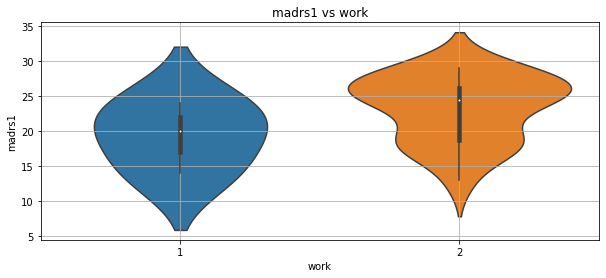

In [20]:
# impact of feature on score madrs1 (at begin of activity measurement)
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=data_condition, x=f, y='madrs1')
    plt.title('madrs1 vs ' + f)
    plt.grid()
    plt.show()

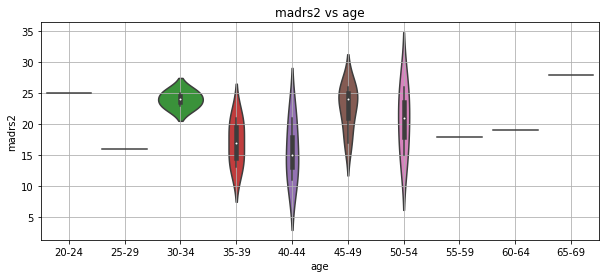

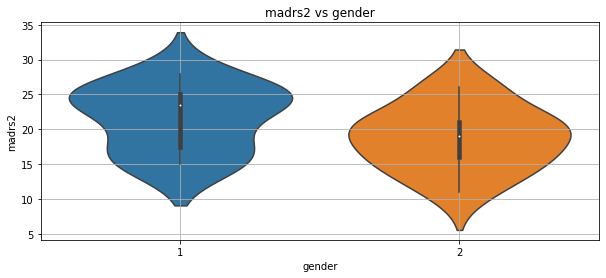

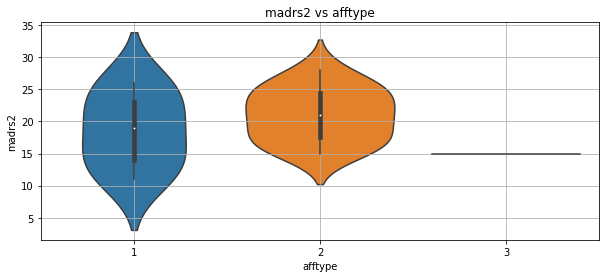

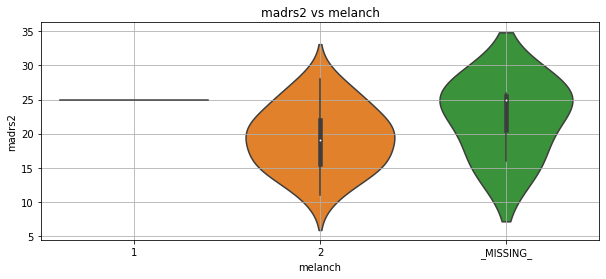

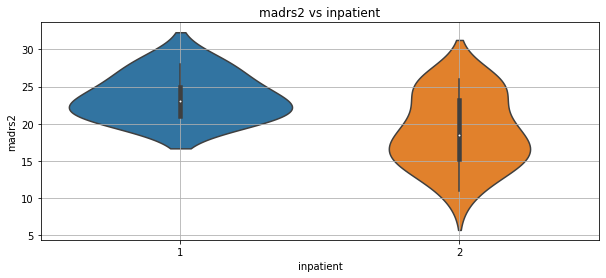

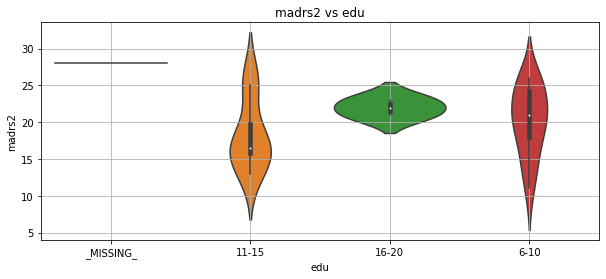

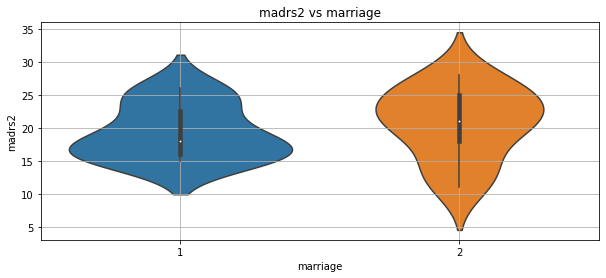

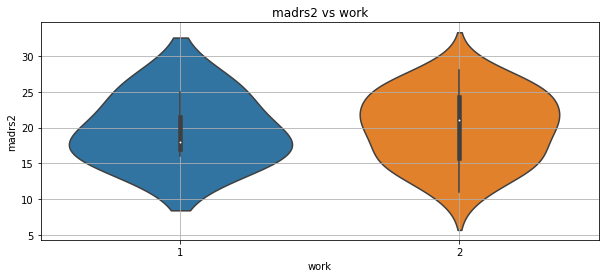

In [21]:
# impact of feature on score madrs2 (at end of activity measurement)
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=data_condition, x=f, y='madrs2')
    plt.title('madrs2 vs ' + f)
    plt.grid()
    plt.show()

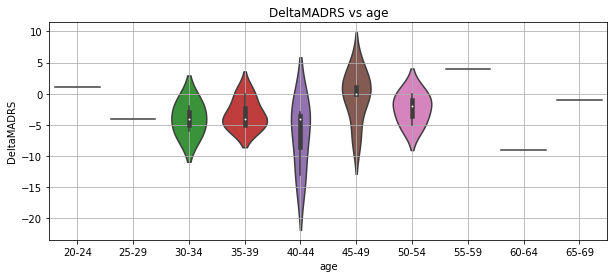

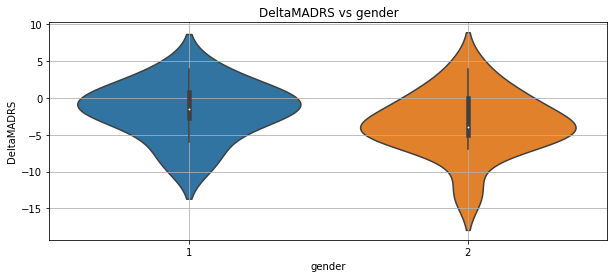

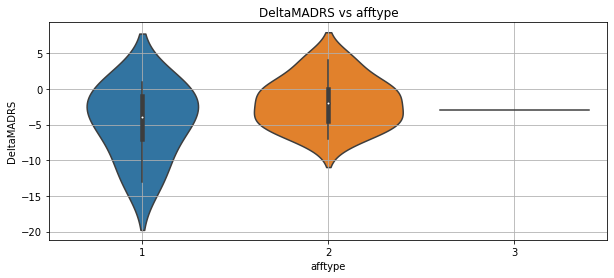

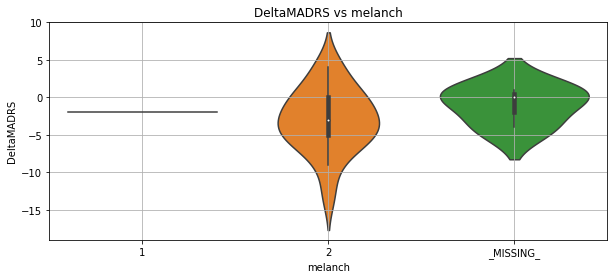

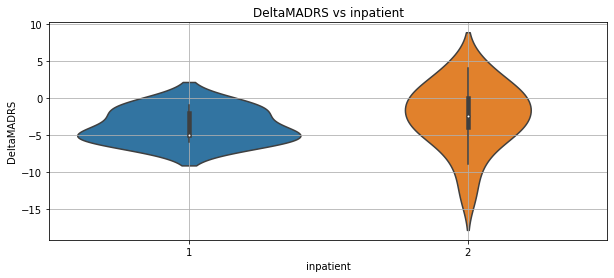

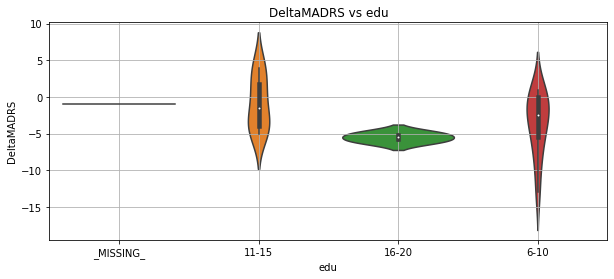

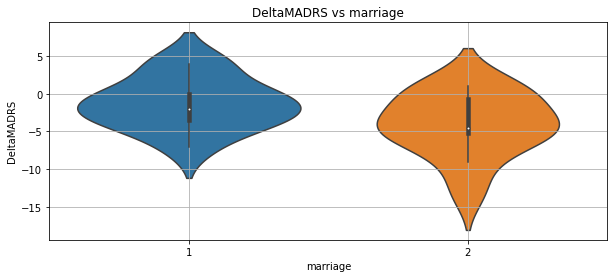

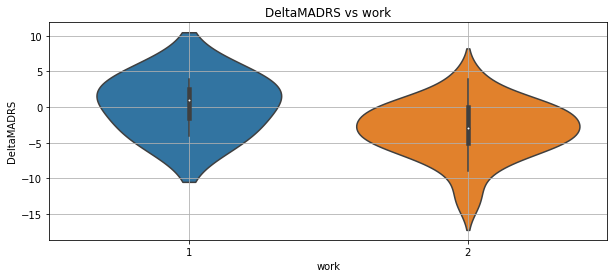

In [23]:
# impact of feature on score difference DeltaMADRS = madrs2 - madrs1
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=data_condition, x=f, y='DeltaMADRS')
    plt.title('DeltaMADRS vs ' + f)
    plt.grid()
    plt.show()

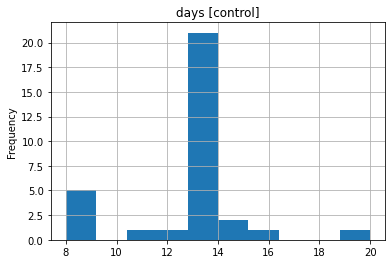

In [24]:
# distribution of days
data_control.days.plot(kind='hist')
plt.title('days [control]')
plt.grid()
plt.show()

In [25]:
data_control.age = data_control.age.astype('category')
data_control.gender = data_control.gender.astype('category')

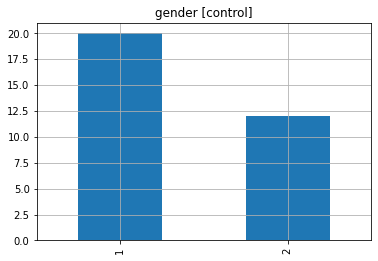

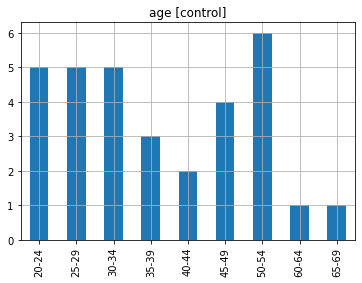

In [27]:
# plot distributions of categorical features
data_control.gender.value_counts().sort_index().plot(kind='bar')
plt.title('gender [control]')
plt.grid()
plt.show()

data_control.age.value_counts().sort_index().plot(kind='bar')
plt.title('age [control]')
plt.grid()
plt.show()

In [32]:
# load a specific file
my_file = 'condition/condition_1.csv'
data_act = pd.read_csv(my_file)
data_act.head(10)

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166
5,2003-05-07 12:05:00,2003-05-07,160
6,2003-05-07 12:06:00,2003-05-07,17
7,2003-05-07 12:07:00,2003-05-07,646
8,2003-05-07 12:08:00,2003-05-07,978
9,2003-05-07 12:09:00,2003-05-07,306


In [33]:
data_act.shape

(23244, 3)

In [34]:
# basic stats of activity
data_act.activity.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    23244.000000
mean       146.948030
std        294.592424
min          0.000000
1%           0.000000
10%          0.000000
25%          0.000000
50%          9.000000
75%        172.000000
90%        469.000000
99%       1300.000000
max       3526.000000
Name: activity, dtype: float64

In [35]:
# add logarithmic version of activity
data_act['log1_act'] = np.log10(1+data_act.activity)

# add non-zero indicator for activity
data_act['non_zero'] = (data_act.activity>0).astype(int)

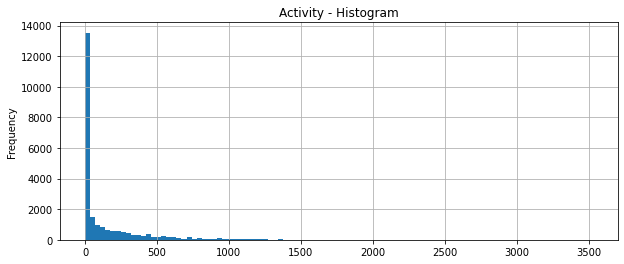

In [36]:
# distribution of activity
plt.figure(figsize=(10,4))
data_act.activity.plot(kind='hist', bins=100)
plt.title('Activity - Histogram')
plt.grid()
plt.show()

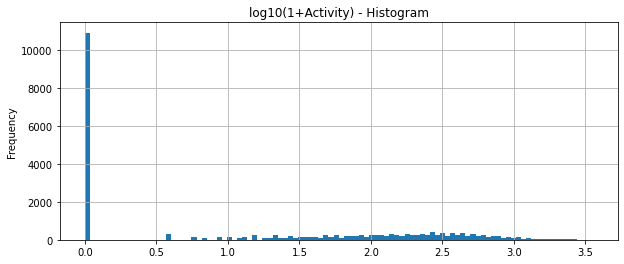

In [37]:
# distribution of activity - log transformation
plt.figure(figsize=(10,4))
data_act.log1_act.plot(kind='hist', bins=100)
plt.title('log10(1+Activity) - Histogram')
plt.grid()
plt.show()

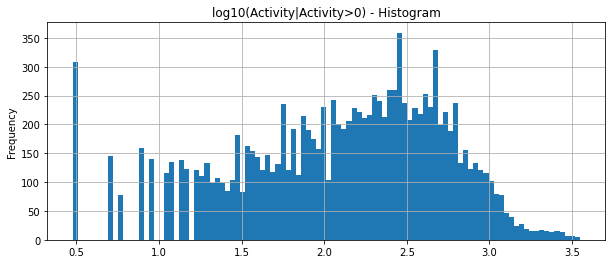

In [38]:
# distribution of activity - log transformation - non zeroes only
plt.figure(figsize=(10,4))
np.log10(data_act[data_act.non_zero==1].activity).plot(kind='hist', bins=100)
plt.title('log10(Activity|Activity>0) - Histogram')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


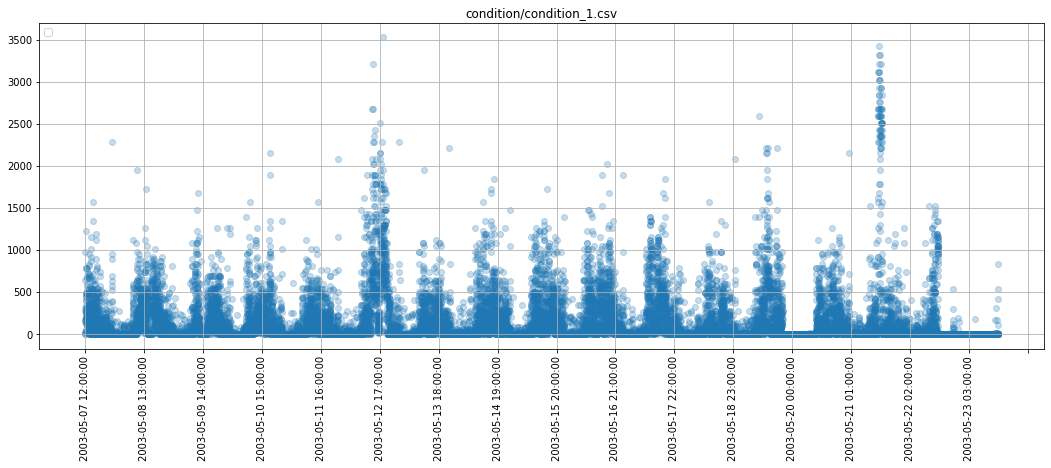

In [39]:
# plot full activity time series
my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(data_act.timestamp, data_act.activity , alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
ax.legend(loc='upper left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


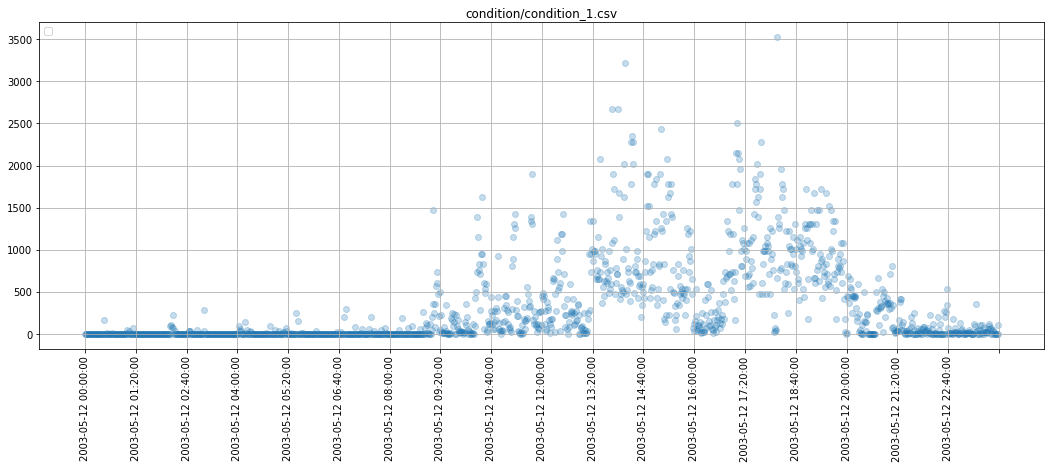

In [40]:
# zoom into a specific day
data_act_zoom = data_act[data_act.date=='2003-05-12']
my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(data_act_zoom.timestamp, data_act_zoom.activity, alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
ax.legend(loc='upper left')
plt.show()

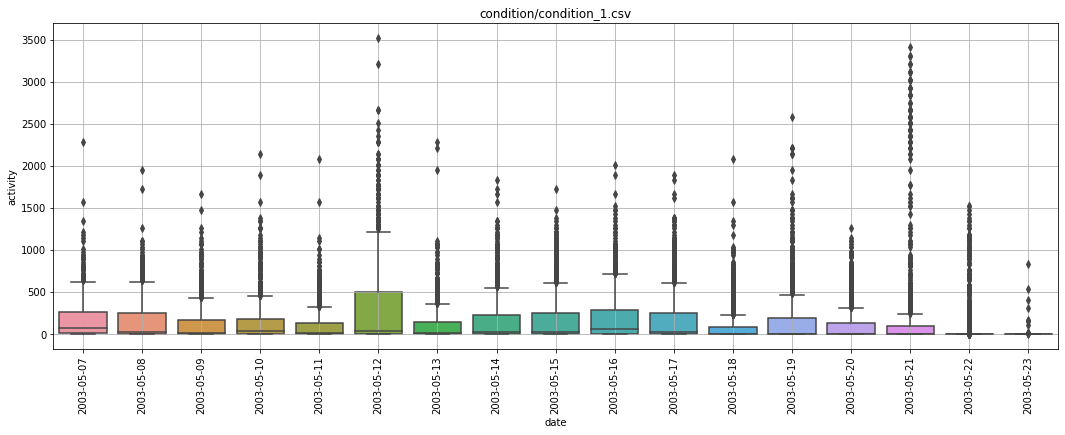

In [41]:
# group activity by date
plt.subplots(figsize=(18,6))
sns.boxplot(data=data_act, x='date', y='activity')
plt.xticks(rotation=90)
plt.title(my_file)
plt.grid()
plt.show()

In [43]:
# group by date
data_act_by_date = data_act.groupby(['date'], as_index=False).agg(
    n = pd.NamedAgg(column='activity', aggfunc='count'),
    n_non_zero = pd.NamedAgg(column='non_zero', aggfunc='sum'),
    mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
    q75_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=75)),
    q90_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=90)),
    q95_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=95)),
    q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
    max_act = pd.NamedAgg(column='activity', aggfunc='max'))

data_act_by_date

,date,n,n_non_zero,mean_act,q75_act,q90_act,q95_act,q99_act,max_act
0,2003-05-07,720,573,174.144444,259.00,485.0,667.0,1003.92,2284
1,2003-05-08,1440,851,156.247222,252.25,485.0,626.0,890.00,1954
2,2003-05-09,1440,775,124.135417,172.00,398.0,587.0,948.00,1672
3,2003-05-10,1440,901,134.961806,184.00,411.0,587.0,1097.35,2146
4,2003-05-11,1440,835,99.439583,134.00,328.0,469.0,759.00,2080
5,2003-05-12,1440,873,316.874306,500.00,1010.0,1384.0,2055.04,3526
6,2003-05-13,1440,770,108.475694,148.00,361.0,469.0,879.08,2284
7,2003-05-14,1440,869,155.684722,227.00,469.0,667.0,1182.00,1836
8,2003-05-15,1440,864,170.877083,250.00,533.0,759.0,1146.00,1725
9,2003-05-16,1440,948,190.508333,288.50,568.0,759.0,1167.96,2016


In [44]:
# remove incomplete days from stats
data_act_by_date = data_act_by_date[data_act_by_date.n==1440] # 1440 = 24*60 minutes in a day
data_act_by_date

,date,n,n_non_zero,mean_act,q75_act,q90_act,q95_act,q99_act,max_act
1,2003-05-08,1440,851,156.247222,252.25,485.0,626.0,890.00,1954
2,2003-05-09,1440,775,124.135417,172.00,398.0,587.0,948.00,1672
3,2003-05-10,1440,901,134.961806,184.00,411.0,587.0,1097.35,2146
4,2003-05-11,1440,835,99.439583,134.00,328.0,469.0,759.00,2080
5,2003-05-12,1440,873,316.874306,500.00,1010.0,1384.0,2055.04,3526
6,2003-05-13,1440,770,108.475694,148.00,361.0,469.0,879.08,2284
7,2003-05-14,1440,869,155.684722,227.00,469.0,667.0,1182.00,1836
8,2003-05-15,1440,864,170.877083,250.00,533.0,759.0,1146.00,1725
9,2003-05-16,1440,948,190.508333,288.50,568.0,759.0,1167.96,2016
10,2003-05-17,1440,853,177.760417,250.00,587.0,835.0,1205.79,1894


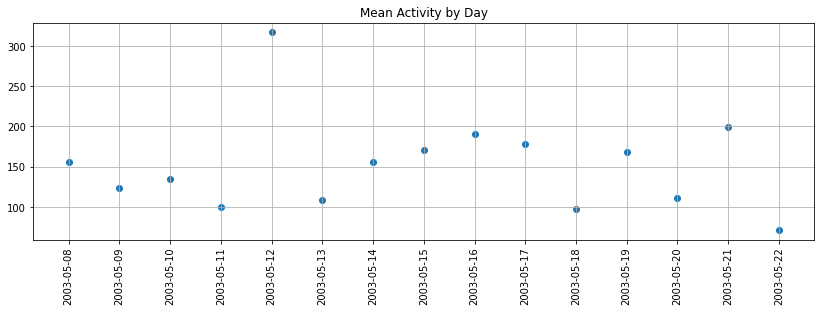

Mean of daily means: 152.2
Stdev of daily means: 59.22


In [45]:
# plot mean activity by day
plt.figure(figsize=(14,4))
plt.scatter(data_act_by_date.date, data_act_by_date.mean_act)
plt.title('Mean Activity by Day')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print('Mean of daily means:', np.round(data_act_by_date.mean_act.mean(),2))
print('Stdev of daily means:', np.round(data_act_by_date.mean_act.std(),2))

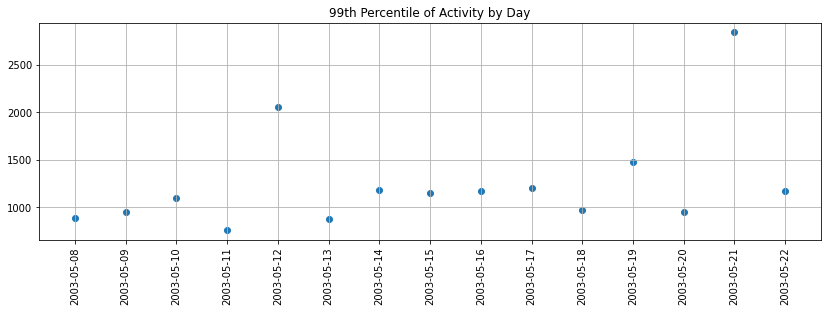

Mean of daily 99th percentile: 1248.37
Stdev of daily 99th percentile: 537.75


In [46]:
# plot 99th percentile of activity by day
plt.figure(figsize=(14,4))
plt.scatter(data_act_by_date.date, data_act_by_date.q99_act)
plt.title('99th Percentile of Activity by Day')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print('Mean of daily 99th percentile:', np.round(data_act_by_date.q99_act.mean(),2))
print('Stdev of daily 99th percentile:', np.round(data_act_by_date.q99_act.std(),2))

In [ ]:
# show all condition files
# !ls ../input/the-depression-dataset/data/condition

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


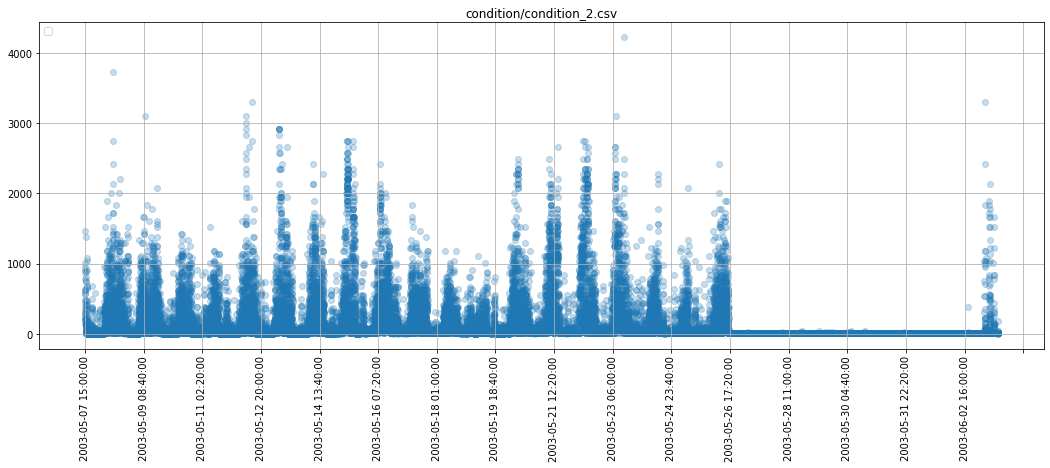

In [47]:
# load and plot full activity time series
my_file = 'condition/condition_2.csv'
data_temp = pd.read_csv(my_file)

my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(data_temp.timestamp, data_temp.activity , alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
ax.legend(loc='upper left')
plt.show()